## Compare perfect information vs no perfect information

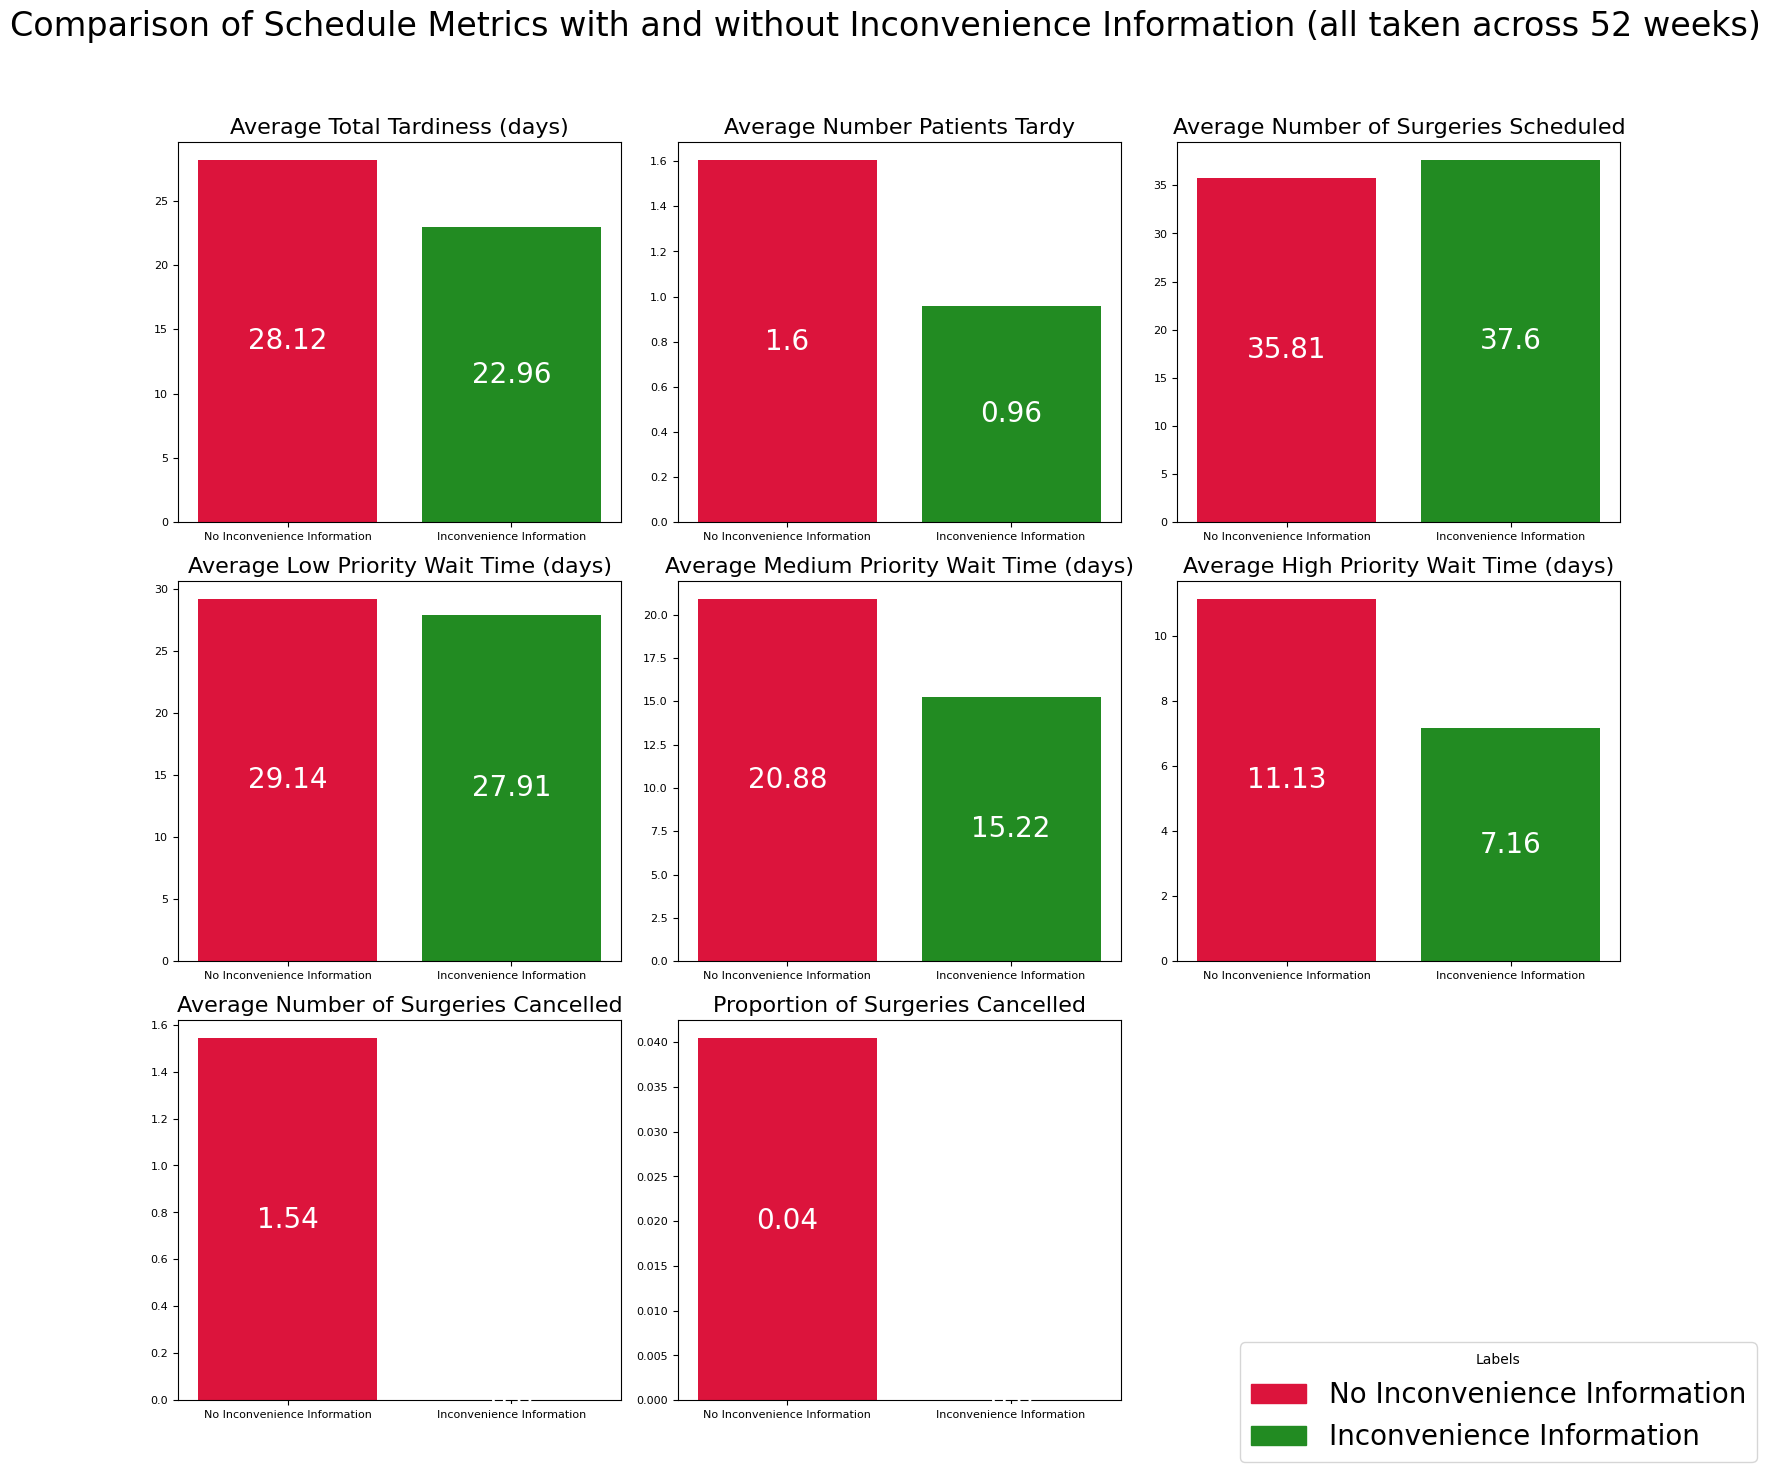

In [58]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from pathlib import Path
import os

from matplotlib.patches import Patch

plt.style.use('presentation.mplstyle')

# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databases'))

# Check if the path is correct
csv_path = os.path.join(OUTPUT_DIR, "average_values_specialty_0.csv")

avg_values = pd.read_csv(csv_path)

# Labels for the bars
labels = ['No Inconvenience Information', 'Inconvenience Information']

categories = [
    'total tardiness', 'number of patients tardy', 'number of surgeries scheduled', 
    'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 'average wait time 0.66 < priority',
    'num surgeries cancelled', 'cancelation proportion'
]

title_map = {
    'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
    'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
    'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
    'total tardiness': 'Average Total Tardiness (days)', 
    'number of patients tardy': 'Average Number Patients Tardy', 
    'number of surgeries scheduled': 'Average Number of Surgeries Scheduled', 
    'num surgeries cancelled': 'Average Number of Surgeries Cancelled',
    'cancelation proportion': 'Proportion of Surgeries Cancelled'
}

# Define colors for each label
color_map = {
    'Inconvenience Information': '#228B22',
    'No Inconvenience Information': '#DC143C',
}

# Get colors for each label
colors = [color_map[label] for label in labels]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each bar graph
for i in range(8):
    bars = axes[i].bar(labels, avg_values[categories[i]].values, color=colors)
    axes[i].set_title(title_map[categories[i]], fontsize=16)
    # Add labels
    for bar in bars:
        yval = round(bar.get_height(), 2)
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=20)

# Hide the last two empty subplots
for j in range(8, 9):
    fig.delaxes(axes[j])

# Create custom legend handles
handles = [Patch(color=color_map[label], label=label) for label in labels]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower right', title='Labels', prop={'size': 20})
fig.suptitle("Comparison of Schedule Metrics with and without Inconvenience Information (all taken across 52 weeks)", fontsize=24)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()



## Compare Disruption Constraint vs no disruption constraint

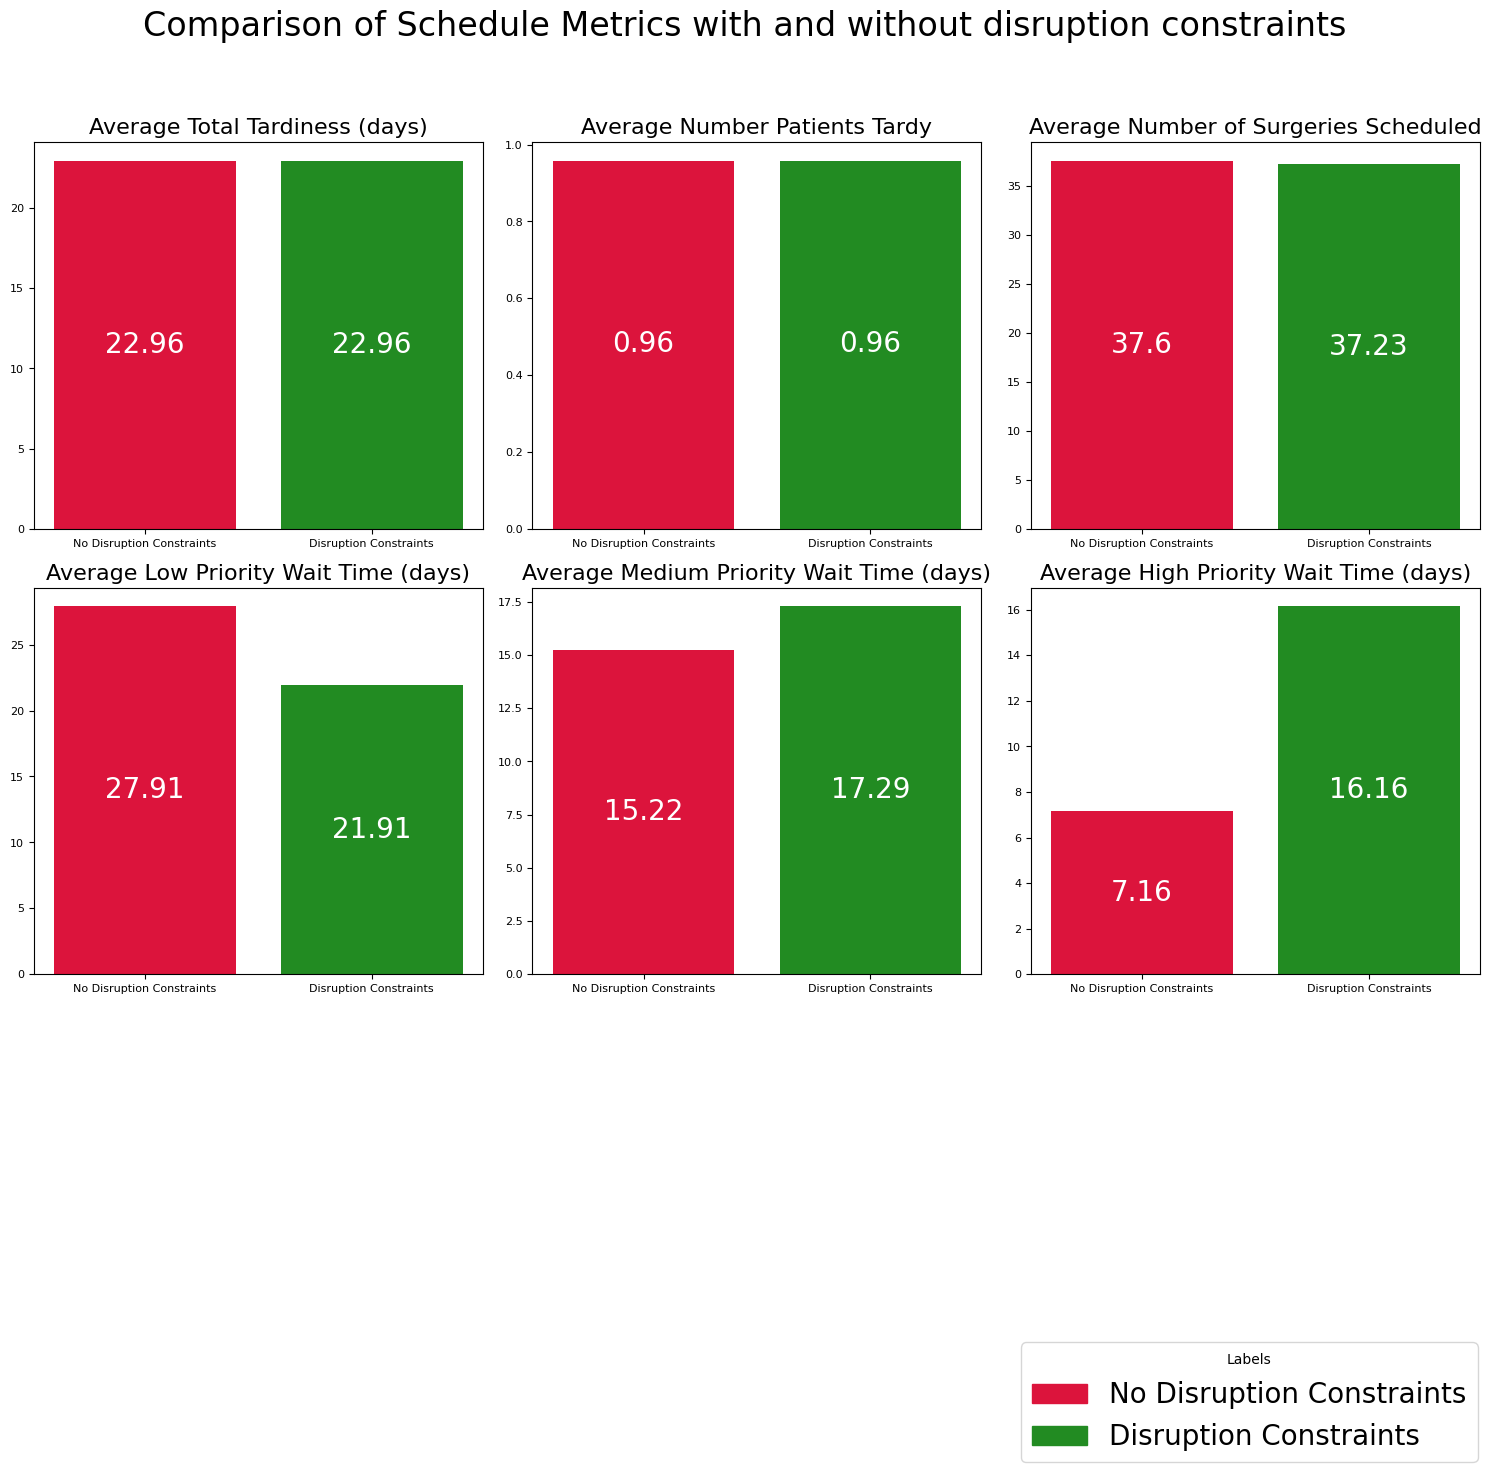

In [12]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from pathlib import Path
import os

from matplotlib.patches import Patch

import sys

plt.style.use('presentation.mplstyle')

# Brodie's path path 
repo_path = Path("C:/Users/Grant Dye/Documents/Uni/Engsci/4th year/part4project/surgery_scheduling/brodie_perrie_code")
OUTPUT_DIR = os.path.abspath(os.path.join(repo_path,'output/databaseTests'))

# Check if the path is correct
no_disruption_path = os.path.join(OUTPUT_DIR, "average_values_specialty_0.csv")
disruption_path = os.path.join(OUTPUT_DIR, "average_values_specialty_0_disruptionTrue.csv")

no_dis_avg_values = pd.read_csv(no_disruption_path)
dis_avg_values = pd.read_csv(disruption_path)

no_dis_avg_values.drop(columns=['num surgeries cancelled', 'cancelation proportion'], inplace=True)

no_dis_avg_values['disruption constraints?'] = 'No Disruption Constraints'
dis_avg_values['disruption constraints?'] = 'Disruption Constraints'

avg_values = pd.concat([no_dis_avg_values, dis_avg_values],axis=0)
avg_values = avg_values[avg_values['perfect_information_bool'] == True]


# Labels for the bars
labels = ['No Disruption Constraints', 'Disruption Constraints']

categories = [
    'total tardiness', 'number of patients tardy', 'number of surgeries scheduled', 
    'average wait time (priority < 0.33)', 'average wait_time (0.33 < priority < 0.66)', 'average wait time 0.66 < priority'
]

title_map = {
    'average wait time (priority < 0.33)': 'Average Low Priority Wait Time (days)', 
    'average wait_time (0.33 < priority < 0.66)': 'Average Medium Priority Wait Time (days)', 
    'average wait time 0.66 < priority': 'Average High Priority Wait Time (days)', 
    'total tardiness': 'Average Total Tardiness (days)', 
    'number of patients tardy': 'Average Number Patients Tardy', 
    'number of surgeries scheduled': 'Average Number of Surgeries Scheduled', 
}

# Define colors for each label
color_map = {
    'Disruption Constraints': '#228B22',
    'No Disruption Constraints': '#DC143C',
}

# Get colors for each label
colors = [color_map[label] for label in labels]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each bar graph
for i in range(6):
    bars = axes[i].bar(labels, avg_values[categories[i]].values, color=colors)
    axes[i].set_title(title_map[categories[i]], fontsize=16)
    # Add labels
    for bar in bars:
        yval = round(bar.get_height(), 2)
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval / 2, f'{yval}', ha='center', va='center', color='white', fontsize=20)

# Hide the last two empty subplots
for j in range(6, 9):
    fig.delaxes(axes[j])

# Create custom legend handles
handles = [Patch(color=color_map[label], label=label) for label in labels]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower right', title='Labels', prop={'size': 20})
fig.suptitle("Comparison of Schedule Metrics with and without disruption constraints", fontsize=24)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()